# 1. 텐서 생성하기


In [0]:
import torch # Pytorch 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [0]:
 # written by Seongtae Kim
 def tensor_draw(ten): #3차원까지만 생성가능, 소수점의 경우 정수로 변환
  if ten.type() == 'torch.FloatTensor': # float의 경우 정수로 변환
    data = ten.int().numpy()
  else:
    data = ten.numpy()
  if len(ten.size()) == 3:  # 3차원 텐서의 경우
    for a in range(len(data)):
      fig, ax = plt.subplots()
      for (b, c), z in np.ndenumerate(data[a]):
        ax.matshow(data[a])
        ax.text(c, b, '{:d}'.format(z), ha='center', va='center', fontsize=15)
      plt.show()   
  elif len(ten.size()) <= 2: # 2차원의 경우
    if len(ten.size()) == 0: # 스칼라일 경우
      data = ten.int().unsqueeze(0).unsqueeze(0).numpy()
    elif len(ten.size()) == 1: # 벡터의 경우
      data = ten.int().unsqueeze(0).numpy()
    fig, ax = plt.subplots()
    for (a, b), z in np.ndenumerate(data):
      ax.matshow(data)
      ax.text(b, a, '{:d}'.format(z), ha='center', va='center', fontsize=15)
    plt.show()  

tensor([[7., 3., 2.],
        [8., 9., 1.]])


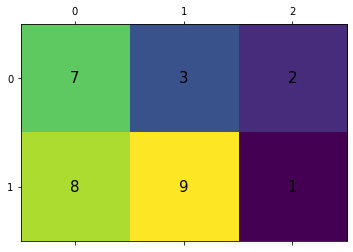

In [3]:
# 텐서 생성하기 기본
tensor_1 = torch.Tensor([[7, 3, 2], [8, 9, 1]]) # 2차원 행렬
print(tensor_1)
tensor_draw(tensor_1)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


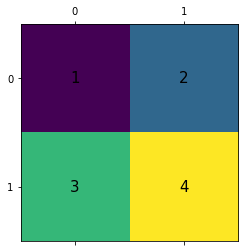

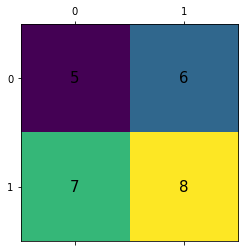

In [9]:
# 나도 만들어보자! 텐서!
yourTensor = torch.Tensor([[[1,2], [3,4]], [[5,6],[7,8]]])
print(yourTensor)
tensor_draw(yourTensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


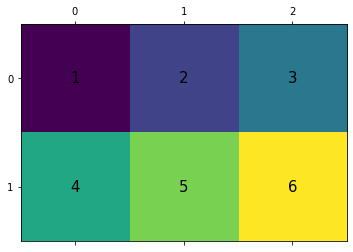

In [10]:
# 파이썬 기본 리스트로부터 텐서 생성하기
tensor_list = [[1, 2, 3], [4, 5, 6]]
tensor_2 = torch.Tensor(tensor_list)
print(tensor_2)
tensor_draw(tensor_2)

In [17]:
# 의사난수로 텐서 생성
tensor_3 = torch.rand(2, 3) # 2행 3열의 난수 텐서 생성
print(tensor_3)

# 최솟값 1, 최댓값 10, 4x4사이즈로 된 정수로 이루어진 의사 난수 텐서 생성
tensor_4 = torch.randint(low=1, high=10, size=(4,4)) 
print(tensor_4)

tensor([[0.3793, 0.1519, 0.5200],
        [0.9186, 0.8671, 0.8681]])
tensor([[6, 5, 4, 4],
        [3, 3, 5, 5],
        [7, 4, 7, 1],
        [6, 4, 3, 5]])


In [19]:
# 16비트 정수형 텐서
tensor_5 = torch.ShortTensor([[1,2,3],[4,5,6]])
print(tensor_5.type())

# 32비트 실수형 텐서
tensor_6 = torch.FloatTensor(np.array([[1,2,3],[4,5,6]]))
print(tensor_6.type())

# 64비트 정수형 텐서
tensor_7 = torch.LongTensor(np.array([[1,2,3],[4,5,6]]))
print(tensor_7.type())

# 8비트 정수형(부호비트X)
tensor_8 = torch.ByteTensor([True, False, True, False]) # 주로 Boolean type의 데이터에 사용된다.
print(tensor_8.type())


torch.ShortTensor
torch.FloatTensor
torch.LongTensor
torch.ByteTensor


# 2. 텐서 조작해보기

In [0]:
# 교과서에 있는 함수는 3차원 텐서 전용이기에 수정함
import matplotlib.pyplot as plt
def show_slice(slc):
  if len(slc.size()) > 2: # 3차원 이상일 경우
    fig, axes = plt.subplots(len(slc), 1)
    for i in range(len(slc)):
      axes[i].matshow(slc.numpy()[i], vmin=0, vmax=1, cmap='spring')
  else: # 2차원일 경우
    fig, axes = plt.subplots()
    axes.matshow(slc.numpy(), vmin=0, vmax=1, cmap='summer')
  plt.show()

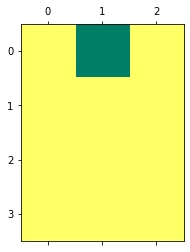

In [21]:
tensor_10 = torch.randint(low=0, high=9, size=(4, 3)) # 4x3 사이즈의 텐서 만들기
slc = torch.ones_like(tensor_10)
slc[0,1] = 0  # 1번째 행의 2번째 열을 선택
show_slice(slc)


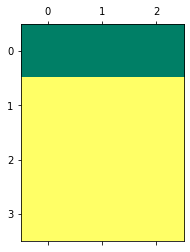

In [26]:
slc = torch.ones_like(tensor_10)
slc[0,:] = 0  # 1번째 행 모두를 선택
show_slice(slc)

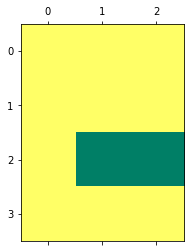

In [0]:
slc = torch.ones_like(tensor_10)
slc[2,1:] = 0  # 3번째 행의 2번째 열부터 끝까지 선택
show_slice(slc)

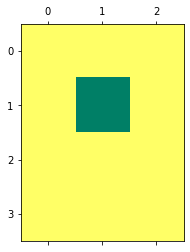

In [29]:
slc = torch.ones_like(tensor_10)
slc[1,1:2] = 0  # 2번째 행의 2번째 열만 선택
show_slice(slc)

view 연산을 수행하기 전: 5x4 사이즈


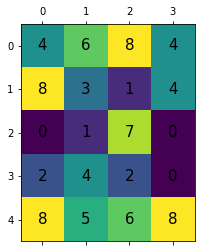

view 연산을 수행한 후: 2x10 사이즈


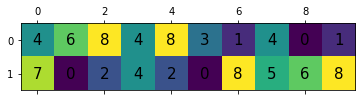

In [0]:
tensor_11 = torch.randint(low=0, high=9, size=(5,4))
print("view 연산을 수행하기 전: 5x4 사이즈")
tensor_draw(tensor_11) # 5x4의 크기를 가짐
print("view 연산을 수행한 후: 2x10 사이즈") # 각 텐서의 요소가 이어붙여짐
tensor_draw(tensor_11.view(2, -1))

전체 전치행렬 수행 전


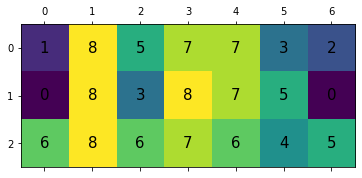

전체 전치행렬 수행 후


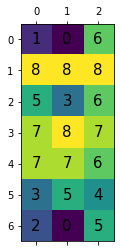

In [0]:
tensor_12 = torch.randint(low=0, high=9, size=(3,7))
print("전체 전치행렬 수행 전")
tensor_draw(tensor_12)
print("전체 전치행렬 수행 후")
tensor_draw(tensor_12.t())

tensor_13 (3x4)


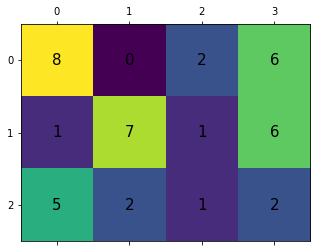

tensor_14 (3x4)


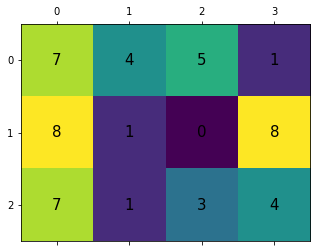

첫번째 차원을 기준으로 tensor_13과 tensor_14를 이으면 (6x4)


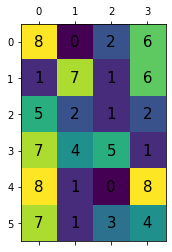

두번째 차원을 기준으로 tensor_18과 tensor_19를 이으면 (3x8)


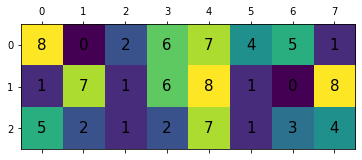

In [0]:
tensor_13 = torch.randint(low=0, high=9, size=(3,4))
tensor_14 = torch.randint(low=0, high=9, size=(3,4))

print("tensor_13 (3x4)")
tensor_draw(tensor_13)
print("tensor_14 (3x4)")
tensor_draw(tensor_14)
print("첫번째 차원을 기준으로 tensor_13과 tensor_14를 이으면 (6x4)")
tensor_draw(torch.cat([tensor_13, tensor_14], dim=0))
print("두번째 차원을 기준으로 tensor_18과 tensor_19를 이으면 (3x8)")
tensor_draw(torch.cat([tensor_13, tensor_14], dim=1))


tensor_13 (3x4)


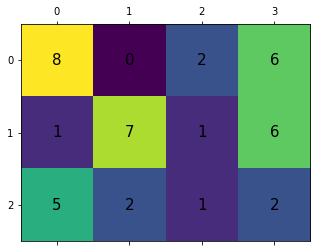

tensor_14 (3x4)


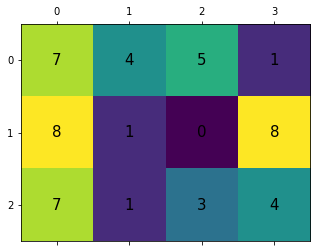

첫번째 차원을 기준으로 tensor_13과 tensor_14를 stack하면 (1x3x4)


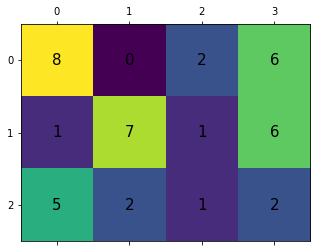

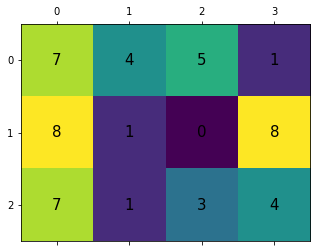

In [0]:
print("tensor_13 (3x4)")
tensor_draw(tensor_13)
print("tensor_14 (3x4)")
tensor_draw(tensor_14)

print("첫번째 차원을 기준으로 tensor_13과 tensor_14를 stack하면 (1x3x4)")
tensor_draw(torch.stack([tensor_13, tensor_14], dim=0))

tensor_15


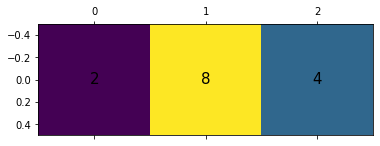

tensor_16


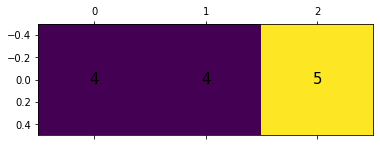

tensor_15 + tensor_16 = ?


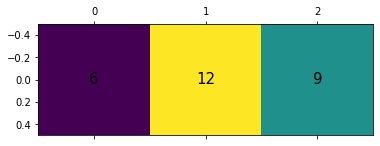

tensor_15 + 3(스칼라) = ?


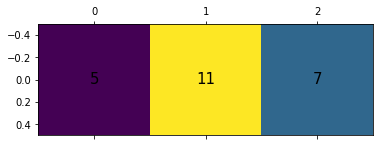

In [0]:
tensor_15 = torch.randint(low=1, high=9, size=(1,3))
tensor_16 = torch.randint(low=1, high=9, size=(1,3))
print("tensor_15")
tensor_draw(tensor_15)
print("tensor_16")
tensor_draw(tensor_16)
print("tensor_15 + tensor_16 = ?")
tensor_draw(torch.add(tensor_15, tensor_16))
print("tensor_15 + 3(스칼라) = ?")
tensor_draw(tensor_15 + 3)

tensor_15


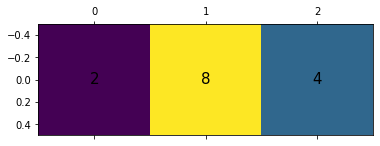

tensor_16


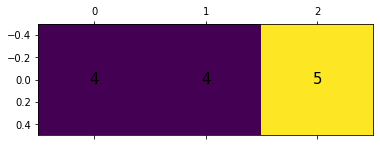

tensor_15 * tensor_16 = ? (원소단위 곱)


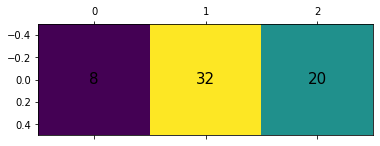

In [0]:
print("tensor_15")
tensor_draw(tensor_15)
print("tensor_16")
tensor_draw(tensor_16)
print("tensor_15 * tensor_16 = ? (원소단위 곱)")
tensor_draw(tensor_15 * tensor_16)
#tensor_draw(torch.mul(tensor_20, tensor_21))

tensor_17


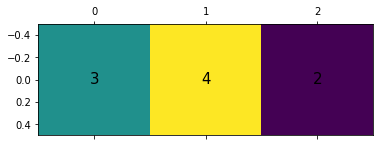

tensor_18


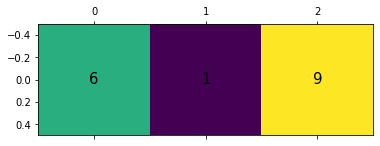

tensor_17 * tensor_18 = ? (원소단위 곱)


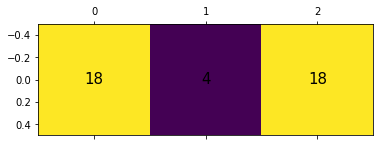

tensor_17와 tensor_18의 내적


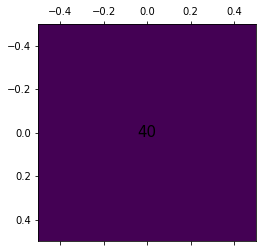

In [0]:
tensor_17 = torch.Tensor([3, 4, 2])
tensor_18 = torch.Tensor([6, 1, 9])

print("tensor_17")
tensor_draw(tensor_17)
print("tensor_18")
tensor_draw(tensor_18)
print("tensor_17 * tensor_18 = ? (원소단위 곱)")
tensor_draw(tensor_17 * tensor_18)
print("tensor_17와 tensor_18의 내적")
tensor_draw(tensor_17.dot(tensor_18))

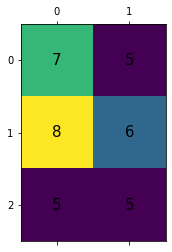

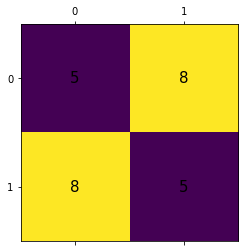

tensor_19와 tensor_20의 행렬곱 결과


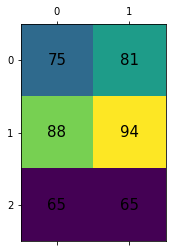

In [0]:
tensor_19 = torch.randint(low=1, high=9, size=(3,2))
tensor_20 = torch.randint(low=1, high=9, size=(2,2))

tensor_draw(tensor_19)
tensor_draw(tensor_20)
print("tensor_19와 tensor_20의 행렬곱 결과")
tensor_draw(tensor_19.mm(tensor_20))

tensor_21


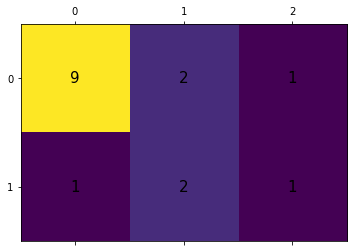

tensor_21의 모든 원소의 합


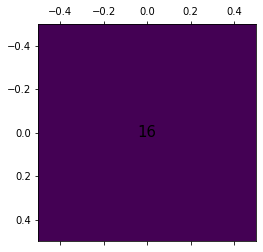

In [0]:
tensor_21 = torch.randint(low=1, high=10, size=(2,3))

print("tensor_21")
tensor_draw(tensor_21)
print("tensor_21의 모든 원소의 합")
tensor_draw(torch.sum(tensor_21))

tensor_22


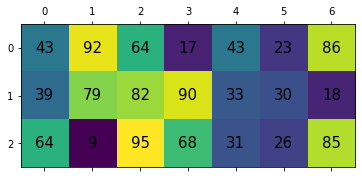

tensor_22의 모든 원소의 최댓값


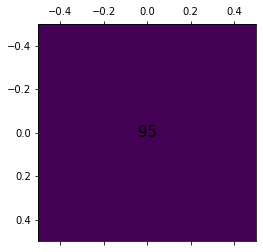

tensor_22의 모든 원소의 최솟값


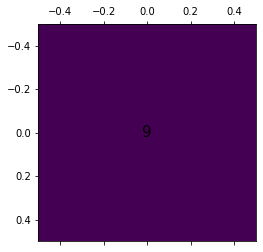

In [0]:
tensor_22 = torch.randint(low=1, high=99, size=(3,7))

print("tensor_22")
tensor_draw(tensor_22)
print("tensor_22의 모든 원소의 최댓값")
tensor_draw(torch.max(tensor_22))
print("tensor_22의 모든 원소의 최솟값")
tensor_draw(torch.min(tensor_22))

## 가중치와 bias를 조절해서 AND, OR, NAND 연산 구현하기

In [0]:
import torch

# 계단함수 정의
def STEP(z):
  if z > 0:
    return True
  else:
    return False

# AND, OR, NAND 함수 정의
def AND(x, w, b):
  z = torch.dot(x, w) + b
  y = STEP(z)
  return y
def OR(x, w, b):
  y = torch.dot(x, w) + b
  a = STEP(y)
  return a
def NAND(x, w, b):
  y = torch.dot(x, w) + b
  a = STEP(y)
  return a

# 각 연산에 맞는 가중치 생성

w_and = torch.Tensor([0.5, 0.5])
b_and = torch.Tensor([-0.7])
w_or = torch.Tensor([0.5, 0.5])
b_or = torch.Tensor([-0.2])
w_nand = torch.Tensor([-0.5, -0.5])
b_nand = torch.Tensor([0.7])

# 입력할 진릿값

X = torch.Tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

In [2]:
# 연산 결과 확인
for x in X:
  print("Input : ",x.long().tolist())
  print("===AND:", AND(x, w=w_and, b=b_and))
  print("===OR:", OR(x, w=w_or, b=b_or))
  print("===NAND:", NAND(x, w=w_nand, b=b_nand))


Input :  [0, 0]
===AND: False
===OR: False
===NAND: True
Input :  [0, 1]
===AND: False
===OR: True
===NAND: True
Input :  [1, 0]
===AND: False
===OR: True
===NAND: True
Input :  [1, 1]
===AND: True
===OR: True
===NAND: False


## 두 개의 퍼셉트론으로 XOR 계산하기

In [0]:
def XOR(x, **kwargs):
  s1 = NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand'])
  s2 = OR(x, w=kwargs['w_or'], b=kwargs['b_or'])
  result = AND(torch.Tensor([s1, s2]), w=kwargs['w_and'], b=kwargs['b_and'])
  return result

In [0]:
# 계산 결과 확인
input_data = torch.FloatTensor([[0, 0],
                               [1, 0],
                               [0, 1],
                               [1, 1]])
kwargs = dict([('w_nand', w_nand), ('b_nand', b_nand),
               ('w_or', w_or), ('b_or', b_or),
               ('w_and', w_and), ('b_and', b_and)])

for x in input_data:
  pred = XOR(x, **kwargs)
  print("Input: ",x.long().tolist())
  print("===XOR: {}".format(pred))

Input:  [0, 0]
===XOR: False
Input:  [1, 0]
===XOR: True
Input:  [0, 1]
===XOR: True
Input:  [1, 1]
===XOR: False


## Torch.nn을 사용해 다중퍼셉트론 구현해 보기

In [0]:
import torch
import torch.nn as nn

# 입력층 -> 은닉층
linear_ih = nn.Linear(in_features=2, out_features=2)
# 은닉층 -> 출력층
linear_ho = nn.Linear(in_features=2, out_features=1)
activation_layer = nn.Sigmoid()

z1 = linear_ih(x)
a1 = activation_layer(z1)
z2 = linear_ho(a1)
y = activation_layer(z2)
print(y.item())

0.49931347370147705


## 사용자 정의 신경망 모듈

In [0]:
class Network(nn.Module):
  """XOR NETWORK"""
  def __init__(self, input_size, hidden_size, output_size):
    super(Network, self).__init__()
    self.linear_ih = nn.Linear(in_features=input_size,
                               out_features=hidden_size)
    self.linear_ho = nn.Linear(in_features=hidden_size,
                               out_features=output_size)
    self.activation_layer = nn.Sigmoid()

  def forward(self, x):
    z1 = self.linear_ih(x)
    a1 = self.activation_layer(z1)
    z2 = self.linear_ho(a1)
    y = self.activation_layer(z2)
    return y

In [0]:
# 만든 클래스 사용해보기
net = Network(input_size=2, hidden_size=2, output_size=1)
y = net(x)
print(y.item())

0.33394744992256165


## Softmax


In [3]:
import torch

torch.manual_seed(70)
z = torch.rand(1, 10)
print(z)
softmaxed = torch.softmax(z, dim=1)
print(softmaxed)

tensor([[0.4350, 0.3591, 0.3411, 0.2644, 0.6656, 0.1341, 0.7236, 0.6668, 0.1091,
         0.5745]])
tensor([[0.0986, 0.0914, 0.0897, 0.0831, 0.1241, 0.0729, 0.1315, 0.1243, 0.0711,
         0.1133]])


In [0]:
import torch.nn as nn
s = nn.Sigmoid()
sigmoided = s(z)
print("Sigmoid 결과값")
print(sigmoided)
print("Sigmoid 결과값의 총 합")
print(sigmoided.sum())
print("Softmax 결과값")
print(softmaxed)
print("Softmax 결과값의 총 합")
print(softmaxed.sum())

Sigmoid 결과값
tensor([[0.6071, 0.5888, 0.5845, 0.5657, 0.6605, 0.5335, 0.6734, 0.6608, 0.5273,
         0.6398]])
Sigmoid 결과값의 총 합
tensor(6.0413)
Softmax 결과값
tensor([[0.0986, 0.0914, 0.0897, 0.0831, 0.1241, 0.0729, 0.1315, 0.1243, 0.0711,
         0.1133]])
Softmax 결과값의 총 합
tensor(1.)


## Binary Cross Entropy for XOR problem

In [0]:
import torch
import torch.nn as nn

torch.manual_seed(70)

x = torch.Tensor([[0, 1]]) #입력 텐서
t = torch.Tensor([1]) #타겟 텐서

net = Network(input_size=2, hidden_size=2, output_size=1) #XOR 네트워크 호출
y = net(x)

loss_function = nn.BCELoss(reduction="sum")
print(loss_function(y.squeeze(1), t))

tensor(0.8667, grad_fn=<BinaryCrossEntropyBackward>)


# 오차역전파

> 2.2.6 장에 해당하는 코드

In [0]:
import torch
import matplotlib.pyplot as plt

## 미분 계산하기

In [9]:
# 코드 2-15

def function(x):
    """원래 함수"""
    return x**2

def prime_function(x):
    """도함수"""
    return 2*x

x0 = torch.FloatTensor([4])
y0 = prime_function(x0)
print("differentiation of x={} is {:.1f}".format(x0.item(), y0.item()))

differentiation of x=4.0 is 8.0


## 매개변수 개수 구하기

In [10]:
# 코드 2-16

import torch.nn as nn

torch.manual_seed(70)

class Network(nn.Module):
    """XOR Network"""
    def __init__(self, input_size, hidden_size, output_size):
        super(Network, self).__init__()
        # 층을 구성
        # input layer > hidden layer 
        self.linear_ih = nn.Linear(in_features=input_size, out_features=hidden_size)
        # hidden layer > output layer
        self.linear_ho = nn.Linear(in_features=hidden_size, out_features=output_size)
        # activation layer
        self.activation_layer = nn.Sigmoid()
        
    def forward(self, x):
        z1 = self.linear_ih(x)
        a1 = self.activation_layer(z1)
        z2 = self.linear_ho(a1)
        y = self.activation_layer(z2)
        return y

net = Network(input_size=2, hidden_size=2, output_size=1)
num_params = 0
for p in net.parameters():
    num_params += p.view(-1).size(0)
print(num_params)

9


## 계산그래프

### z 함수 순방향 전파

In [11]:
# 코드 2-17

def z_function(t):
    return t**2

def t_function(x, y):
    return x + y

def forward(x, y):
    t = t_function(x, y)
    z = z_function(t)
    return z

x = torch.Tensor([1])
y = torch.Tensor([3])
z = forward(x, y)
print(z)

tensor([16.])


### z 함수 역방향 전파

In [12]:
# 코드 2-18

def z_prime(t):
    """dz/dt"""
    return 2*t

def t_prime():
    """dt/dx = dt/dy"""
    return 1

def backward(t):
    """dz/dx"""
    dx = z_prime(t) * t_prime()
    return dx

x = torch.Tensor([1])
y = torch.Tensor([3])
t = t_function(x, y)
dx = backward(t)
print(dx)

tensor([8.])


### 역전파 수행과정

In [13]:
# 코드 2-19

x = torch.Tensor([1]).requires_grad_()
y = torch.Tensor([3])
z = forward(x, y)

# gradient가 필요한지 점검
print("requires grad: x={} y={}, z={}".format(
    x.requires_grad, y.requires_grad, z.requires_grad))
print("gradient function of z: {}".format(z.grad_fn))

# 역전파 수행 버튼
z.backward()
print("dx = {}".format(x.grad))

requires grad: x=True y=False, z=True
gradient function of z: <PowBackward0 object at 0x7f912dec0898>
dx = tensor([8.])


# 오차역전파

In [14]:
# 코드 2-20

import torch.optim as optim

# 입력과 타겟텐서 생성
x = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
t = torch.Tensor([0, 1, 1, 0])

# 이전에 만든 XOR 네트워크 정의
net = Network(input_size=2, hidden_size=2, output_size=1)

# 손실함수 정의
loss_function = nn.BCELoss()

# 경사하강법 optimizer 정의: 모델의 매개변수를 전달해줘야한다.
optimizer = optim.SGD(params=net.parameters(), lr=0.5)

# 몇회 학습할지 결정: STEP/EPOCH
STEP = 10001

# 학습과정
for step in range(STEP):
    # 경사 초기화
    net.zero_grad()
    # 순방향 전파
    y = net(x)
    # 손실값 계산
    loss = loss_function(y.squeeze(), t)
    # . backward() 함수를 호출하여 역방향 전파
    loss.backward()
    # .step() 함수를 호출하여 경사하강법으로 매개변수 업데이트
    optimizer.step()
    if step % 1000 == 0:
        print("{}:\t {:.4f}".format(step, loss.item()))
        
# 올바른 정답을 출력하는지 테스트한다 
pred = net(x).ge(0.5)
print(pred.view(-1))

0:	 0.6927
1000:	 0.2574
2000:	 0.0210
3000:	 0.0102
4000:	 0.0067
5000:	 0.0049
6000:	 0.0039
7000:	 0.0032
8000:	 0.0028
9000:	 0.0024
10000:	 0.0021
tensor([False,  True,  True, False])


# Summary & Tips

> 2.2.7 장에 해당하는 코드

## Batch & Mini Batch

### 데이터셋 & 데이터로더

In [0]:
# 코드 2-21

import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data_path):
        # 데이터를 불러오는 작업을 진행한다.
        import numpy as np
        with open(data_path, "r", encoding="utf-8") as file:
            data = file.read().splitlines()
            data = np.array([line.split("\t") for line in data], dtype=np.float)
        
        # data 는 1000개의 행, 4개의 열을 가지는 2차원 행렬이다.
        # 그중 입력 데이터는 3개의 피쳐을 가진 1000개의 데이터고, 
        # 마지막 열(1000x1)은 타겟 데이터다. 
        self.x = data[:, :-1]
        self.t = data[:, -1]
        
    def __getitem__(self, index):
        # index 에 해당하는 데이터를 가져온다
        return (self.x[index], self.t[index])
        
    def __len__(self):
        # 데이터의 총 크기(배치)
        return len(self.x)
    
    def custom_collate_fn(self, data):
        # __getitem__ 으로 가져온 data=(x, t)데이터를 전처리해준다.
        ## 여기서는 텐서로 전환한다.
        x, t = list(zip(*data))
        return (torch.FloatTensor(x), torch.LongTensor(t))

example_dataset_path = "example_dataset.tsv"
# 데이터셋 선언
custom_dataset = CustomDataset(data_path=example_dataset_path)
# 데이터로더 선언
train_loader = DataLoader(dataset=custom_dataset,  # 선언한 데이터셋 입력
                          batch_size=64,  # 배치크기 입력
                          collate_fn=custom_dataset.custom_collate_fn,  # 데이터 전처리
                          shuffle=True)  # 셔플도 가능하다

# 테스트
for x, y in train_loader:
    print("size of mini-batch x: {}, t: {}".format(x.size(), y.size()))
    break

# 다양한 경사하강법 알고리즘

In [0]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import defaultdict



# 02-XOR&Perceptron
def draw_function(func, return_fig=False):
    xx = torch.linspace(-5, 5, steps=1000)
    fig = plt.figure()
    plt.plot(xx.numpy(), func(xx).numpy())
    plt.xlabel("x", fontdict={"fontsize":16})
    plt.ylabel("y", fontdict={"fontsize":16}, rotation=0)
    plt.title(f"{func.__name__}", fontdict={"fontsize":20})
    plt.show()
    if return_fig:
        return fig
    
def check_gate(gate_func, **kwargs):
    xx = [(0, 0), (1, 0), (0, 1), (1, 1)]
    predict = torch.stack([gate_func(i, j, w=kwargs['w'], b=kwargs['b']) for i, j in xx])
    if (gate_func.__name__ == "AND"):
        target = torch.ByteTensor([0, 0, 0, 1])
    elif (gate_func.__name__ == "NAND"):
        target = torch.ByteTensor([1, 1, 1, 0])
    elif (gate_func.__name__ == "OR"):
        target = torch.ByteTensor([0, 1, 1, 1])
    elif (gate_func.__name__ == "XOR"):
        target = torch.ByteTensor([0, 1, 1, 0])
    else:
        return "gate_func error"
    for i, j in xx:
        print(f"x1={i}, x2={j}, y={gate_func(i, j, w=kwargs['w'], b=kwargs['b'])}")
    print(f"{predict.eq(target).float().sum()/len(target.float())*100} % right!")


def plot_dots(ax, gate_func):
    x = [(0, 0), (1, 0), (0, 1), (1, 1)]
    if (gate_func.__name__ == "AND"):
        marker_o = list(zip(*x[3:]))
        marker_x = list(zip(*x[:3]))
    elif (gate_func.__name__ == "NAND"):
        marker_o = list(zip(*x[:3]))
        marker_x = list(zip(*x[3:]))
    elif (gate_func.__name__ == "OR"):
        marker_o = list(zip(*x[1:]))
        marker_x = list(zip(*x[:1]))
    elif (gate_func.__name__ == "XOR"):
        marker_o = list(zip(*x[1:3]))
        marker_x = list(zip(*x[::3]))
    else:
        return "gate_func error"
    
    ax.scatter(marker_o[0], marker_o[1], c='r', marker='o', label='1')
    ax.scatter(marker_x[0], marker_x[1], c='b', marker='x', label='0')
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_title(gate_func.__name__)
    ax.grid()
 
def plot_line(**kwargs):
    """x2 = (-w1*x1 - b) / w2"""
    x1 = [-2, 2]
    w = kwargs['w']
    b = kwargs['b']
    get_x2 = lambda x: (-w[0]*x - b) / w[1]
    # plot
    ax=kwargs['ax']
    ax.plot(x1, [get_x2(x1[0]), get_x2(x1[1])], c='g')

def draw_solution(x, w, b, ax, func):
    s = func(x, w=w, b=b).item()
    marker_shape = 'o' if s == 1 else 'x'
    marker_color = 'r' if s == 1 else 'b'
    ax.scatter(x.numpy()[0], x.numpy()[1], c=marker_color, marker=marker_shape, label='{}: {}'.format(func.__name__, s))
    plot_line(ax=ax, w=w, b=b)
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid()
    ax.set_title('[{}] input: {} > result: {}'.format(func.__name__, x.long().numpy(), s))

def draw_solution_by_step(x, **kwargs):
    NAND = kwargs['f_nand']
    OR = kwargs['f_or']
    AND = kwargs['f_and']
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
    s = torch.FloatTensor([NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand']), 
                           OR(x, w=kwargs['w_or'], b=kwargs['b_or'])])
    draw_solution(x, w=kwargs['w_nand'], b=kwargs['b_nand'], ax=axes[0], func=NAND)
    draw_solution(x, w=kwargs['w_or'], b=kwargs['b_or'], ax=axes[1], func=OR)
    draw_solution(s, w=kwargs['w_and'], b=kwargs['b_and'], ax=axes[2], func=AND)
              
# 06-summary
from matplotlib import animation

def draw_gradient_ani(fowrard_function, his, n_step, interval, title):
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = fowrard_function(X, Y)
    levels = [0.1, 1, 2, 3, 4, 6, 8, 10, 14, 18, 24, 30, 50]
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    scat = ax.scatter([], [], s=20, c='g', edgecolors='k')
    data = np.c_[his['x'], his['y']]

    def ani_init():
        scat.set_offsets([])
        return scat,

    def ani_update(i, data, scat):
        scat.set_offsets(data[i])
        return scat,

    plt.contour(X, Y, Z, cmap='RdBu_r', levels=levels)
    plt.title(title, fontsize=20)
    plt.xlabel('x')
    plt.ylabel('y')
    anim = animation.FuncAnimation(fig, ani_update, init_func=ani_init, frames=n_step, 
                                   interval=interval, blit=True, fargs = (data, scat))
    plt.close()
    return anim

def draw_gradient_plot(fowrard_function, his, title="",  rt_fig=False):
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = fowrard_function(X, Y)
    levels = [0.1, 1, 2, 3, 4, 6, 8, 10, 14, 18, 24, 30, 50]
    fig = plt.figure(figsize=(6, 6), dpi=100)
    
    plt.contour(X, Y, Z, cmap='RdBu_r', levels=levels)
    if his is not None:
        plt.plot(his['x'], his['y'], 'go-', markersize=5, linewidth=0.5)
    plt.title(title, fontsize=20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    if rt_fig:
        return fig

def params_init(a=-7.0, b=2.0):
    x = nn.Parameter(torch.FloatTensor([a]))
    y = nn.Parameter(torch.FloatTensor([b]))
    params = nn.ParameterDict(parameters={"x": x, "y": y})
    return params

def optim_his_init(a, b):
    params = params_init(a, b)
    optim_his = defaultdict(list)
    optim_his['x'].append(params.x.item())
    optim_his['y'].append(params.y.item())
    return optim_his, params

def simulation(fowrard_function, params, optimizer, optim_his, n_step):
    for step in range(n_step):
        optimizer.zero_grad()
        loss = fowrard_function(params.x, params.y)
        loss.backward()
        optimizer.step()
        optim_his['x'].append(params.x.item())
        optim_his['y'].append(params.y.item())

    return optim_his

In [0]:
# 필요한 패키지를 로드한다.
import numpy as np
import torch.nn as nn
import torch.optim as optim
from matplotlib import rc
import matplotlib.pylab as plt
rc('animation', html='html5')

In [0]:
def loss_function(x, y):
    return (1/20)*(x**2) + (y**2)

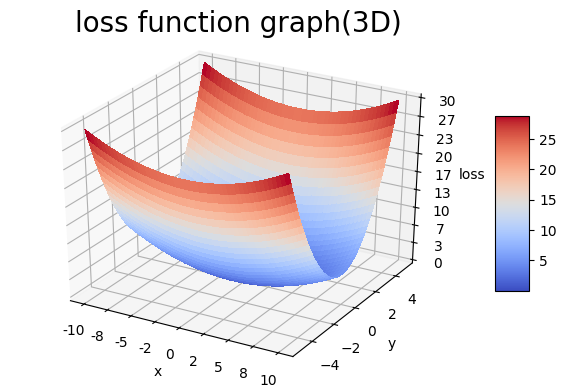

In [20]:
# 그림 2-58(좌)

# 레퍼런스: https://matplotlib.org/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = loss_function(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the axises.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("loss")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("loss function graph(3D)", fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

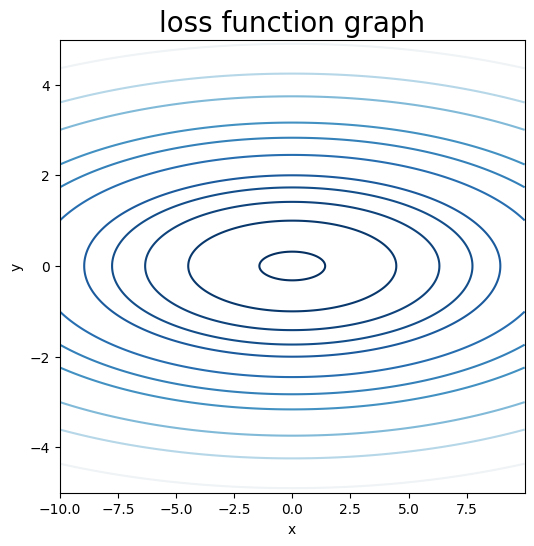

In [21]:
# 그림 2-58(우)

draw_gradient_plot(loss_function, his=None, title="loss function graph")

### SGD

In [0]:
# 그림 2-59

title="SGD(lr=0.9)"
# SGD: 랜덤하게 추출한 일부 데이터를 사용해 더 빨리, 자주 업데이트 (속도 개선)
n_step, interval = 30, 150
# 초기 매개변수: params=(x=-7.0, y=2.0) 와 기록을 위한 optim_his 변수를 선언한다.
optim_his, params = optim_his_init(-7.0, 2.0)
# SGD optimizer를 정의한다: 매개변수와 학습률을 설정한다.
optimizer = optim.SGD([v for v in params.values()], lr=0.9)
# 30 스텝동안 매개변수의 움직임을 시뮬레이션을 한다.
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

In [0]:
# 그림 2-60
# SGD: 랜덤하게 추출한 일부 데이터를 사용해 더 빨리, 자주 업데이트 (속도 개선)
title="SGD(lr=0.1)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.SGD([v for v in params.values()], lr=0.1)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### Momentum

In [0]:
# 그림 2-61
# 모멘텀: 관성의 방향을 고려해 진동과 폭을 줄임 (정확도 개선)
title = "Momentum(lr=0.1, momentum=0.9)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.SGD([v for v in params.values()], lr=0.1, momentum=0.9)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### Adagrad

In [0]:
# 그림 2-62
# 아다그라드: 변수의 업데이트가 잦으면 학습률을 적게하여 보폭 조절 (보폭 크기 개선)
title = "Adagrad(lr=1.5)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.Adagrad([v for v in params.values()], lr=1.5)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### RMSProp

In [0]:
# 그림 2-63
# 알엠에스프롭: 아다그라드의 보폭 민감도를 보완 (보폭 크기 개선)
title = "RMSProp(lr=0.3)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.RMSprop([v for v in params.values()], lr=0.3)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)

### Adam

In [0]:
# 그림 2-64
# 아담: 알엠에스프롭 + 모멘텀 (정확도와 보폭 크기 개선)
title = "Adam(lr=0.3)"
n_step, interval = 30, 150
optim_his, params = optim_his_init(-7.0, 2.0)
optimizer = optim.Adam([v for v in params.values()], lr=0.3)
optim_his = simulation(loss_function, params, optimizer, optim_his, n_step)
draw_gradient_ani(loss_function, optim_his, n_step, interval, title)